<a href="https://colab.research.google.com/github/ShindeAnjali2k6/AIML-25/blob/main/AIML_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
x,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.50,random_state=0)

In [3]:
x.shape

(300, 2)

In [4]:
y_true.shape

(300,)

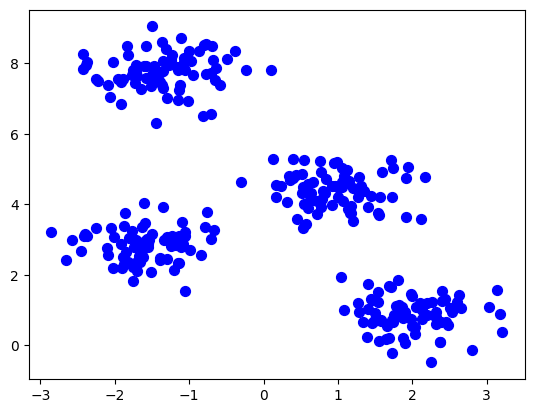

In [5]:
plt.scatter(x[:,0],x[:,1],s=50,color='blue')

In [6]:
from sklearn.cluster import KMeans

In [7]:
KMeans = KMeans(n_clusters=4)

In [8]:
KMeans.fit(x)

KMeans(n_clusters=4)

In [9]:
y_KMeans_Pred = KMeans.predict(x)

In [10]:
centers = KMeans.cluster_centers_
centers

array([[-1.35241261,  7.76731726],
       [ 0.95415778,  4.39985544],
       [ 1.99469693,  0.8727049 ],
       [-1.57480456,  2.84532424]])

In [11]:
centers_pred = KMeans.predict(x)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_KMeans_Pred, y_true)

0.0

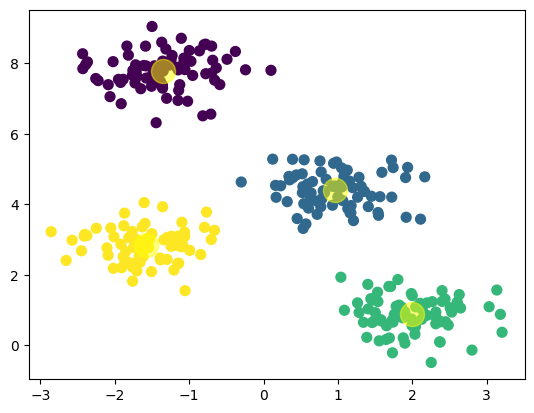

In [13]:
plt.scatter(x[:, 0], x[:, 1], c=y_KMeans_Pred, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, alpha=0.5)

In [14]:
from sklearn.metrics import pairwise_distances_argmin

In [15]:
def find_clusters(x, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]
    while True:
        labels = pairwise_distances_argmin(x, centers)
        new_centers = np.array([x[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

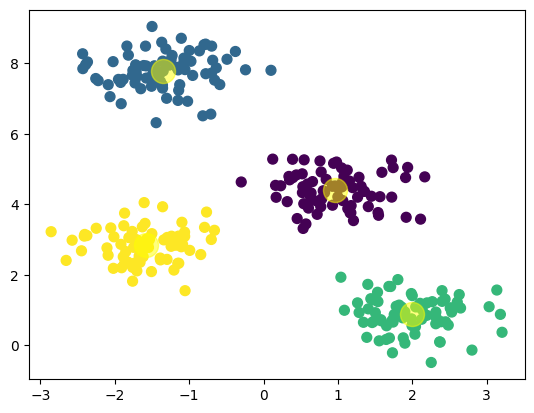

In [16]:
centers, labels = find_clusters(x, 4)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, alpha=0.5)

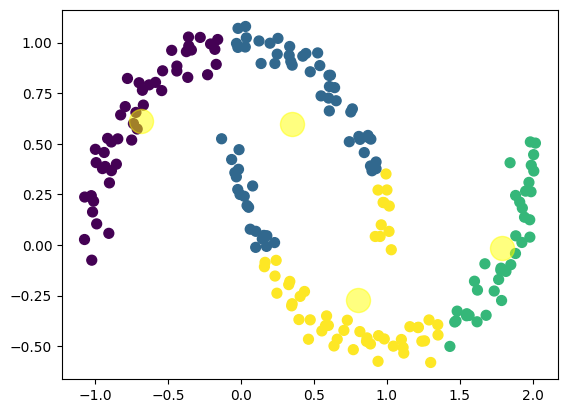

In [18]:
centers, labels = find_clusters(x, 4)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, alpha=0.5)

In [19]:
from sklearn.datasets import make_moons
x, y = make_moons(200, noise=.05, random_state=0)

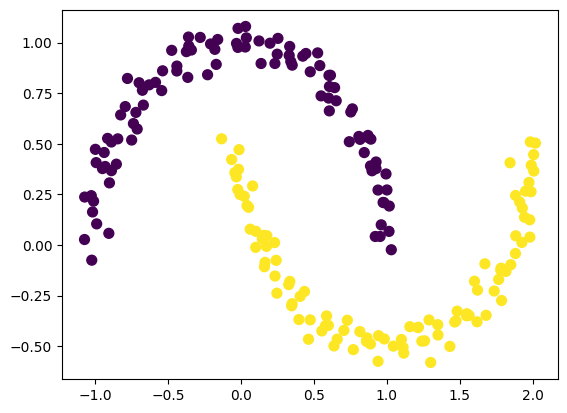

In [20]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='viridis')

In [21]:
from sklearn.cluster import SpectralClustering

In [22]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

In [25]:
label = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


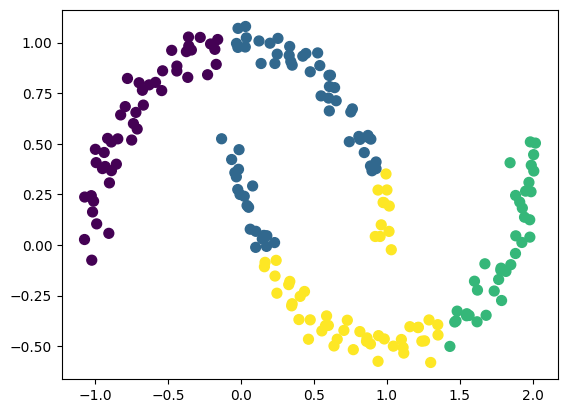

In [27]:
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis')

In [28]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.7, random_state=0)
X = X[:, ::-1]

In [29]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [33]:
def plot_kmeans(kmeans,x,n_clusters=4,rseed=0,ax=None):
  labels=kmeans.fit_predict(x)
  ax=ax or plt.gca()
  ax.axis('equal')
  ax.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis',edgecolor='k',zorder=2)
  centers=kmeans.cluster_centers_
  radii=[cdist(x[labels==i], [center]).max() for i,center in enumerate(centers)]
  for c,r in zip(centers,radii):
    ax.add_patch(plt.Circle(c,r,fc='#CCCCCC',lw=3,alpha=0.5,zorder=1))

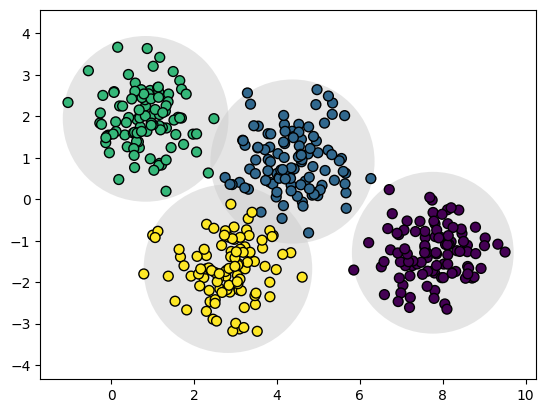

In [35]:
kmeans=KMeans(n_clusters=4,random_state=0,n_init=10)
plot_kmeans(kmeans,X)